#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising_Sales.csv')
df.head(1)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1


In [4]:
df.shape, df['Unnamed: 0'].nunique()

((200, 5), 200)

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.columns = ['TV','Radio','Newspaper','Sales'] # renaming all coulmns
df.sample()

,TV,Radio,Newspaper,Sales
34,95.7,1.4,7.4,9.5


#### Data Preprocessing

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


#### Correlation

Pearson correlation coefficient (linear relationship)
Spearman rank correlation (non-linear relationships):when data is ordinal or not normally distributed.

When two features have a high correlation (e.g., 0.80), may introduce redundancy (multicollinearity), affecting model performance in linear/logistic regression.

1. Keep or Remove?
Remove:
If correlation > 0.7 or 0.8 (depending on context).
Keep Both:
If features are domain-critical or the model (e.g., tree-based like Random Forest, XGBoost) can handle multicollinearity.

2. How to Decide Which Feature to Keep?
Feature Importance: Train a simple model (e.g., random forest/decision tree) to rank features.
Correlation with Target Variable: Retain the feature with a stronger target correlation.
Domain Knowledge
Variance: higher variance (provides more information).

In [13]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### EDA

In [15]:
cols = df.columns
cols

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

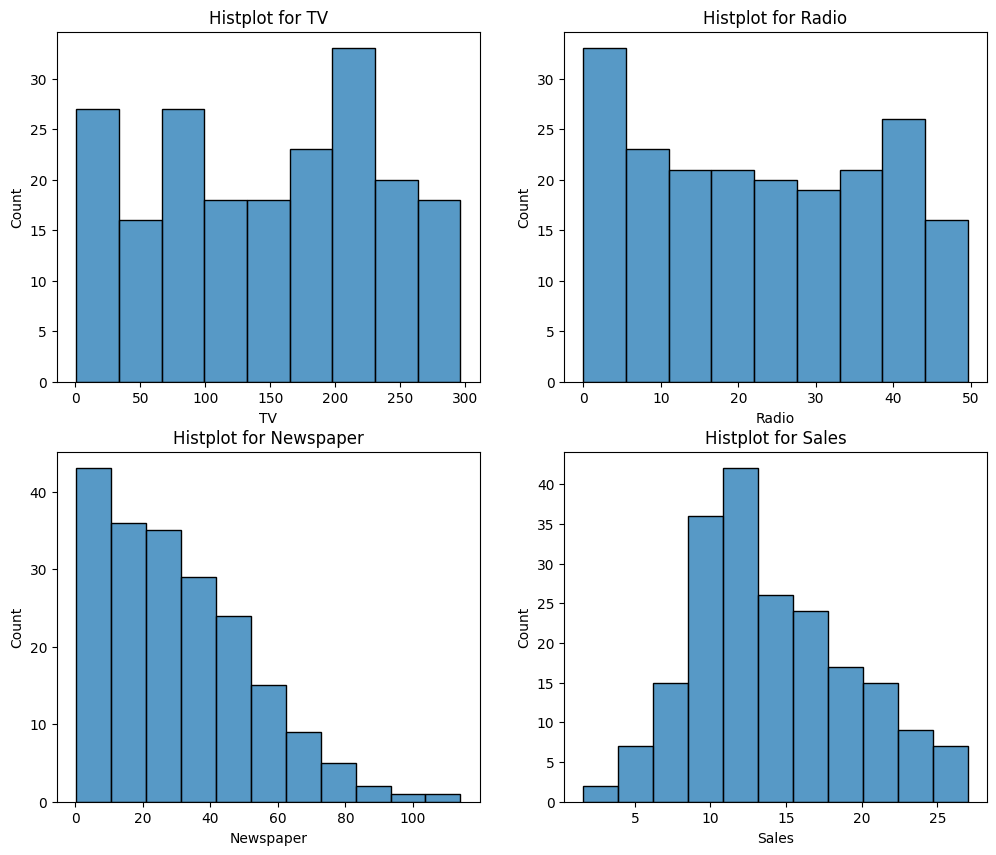

In [21]:
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1) # subplot numbering starts from 1, not 0.
    sns.histplot(x=df[cols[i]])
    plt.title(f'Histplot for {cols[i]}')
plt.show()

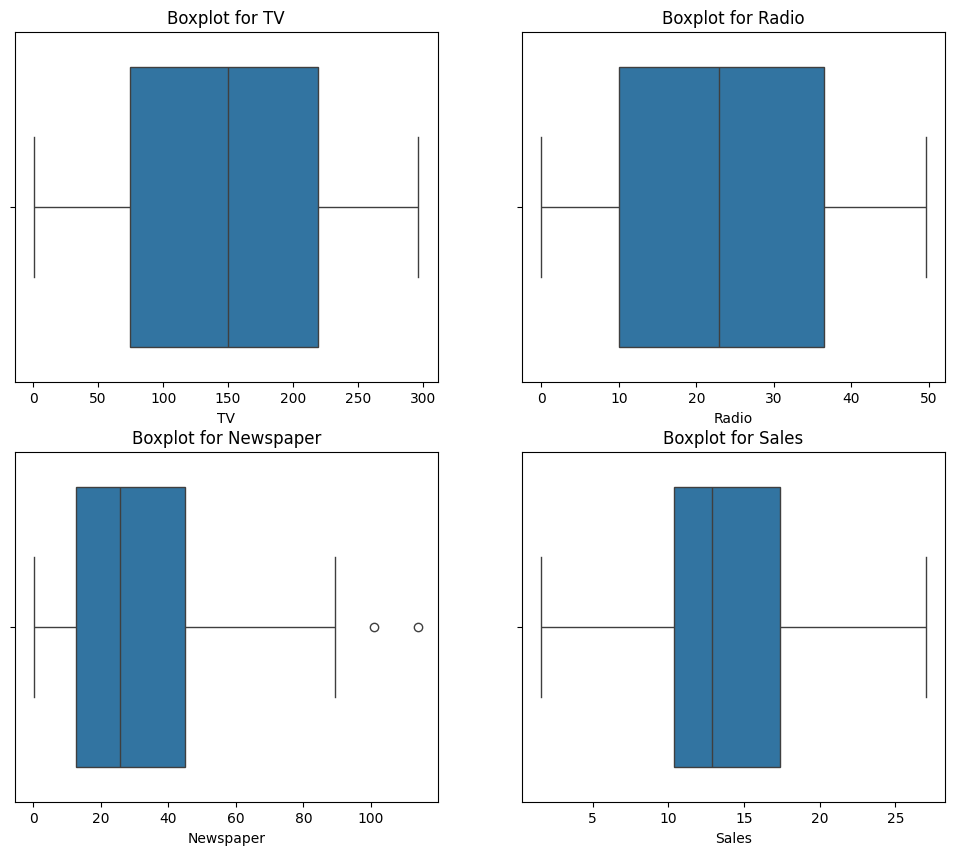

In [22]:
cols = df.columns
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

#### Outlier Treatment

In [24]:
q1 = np.percentile(df['Newspaper'],25)
q3 = df['Newspaper'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
print('IQR',iqr,'Lower',lower,'  Upper',upper)

IQR 32.35 Lower -35.775000000000006   Upper 93.625


In [25]:
df1 = df.copy()

In [28]:
df['Newspaper'] = np.where(df['Newspaper'] > upper , upper, df['Newspaper'])

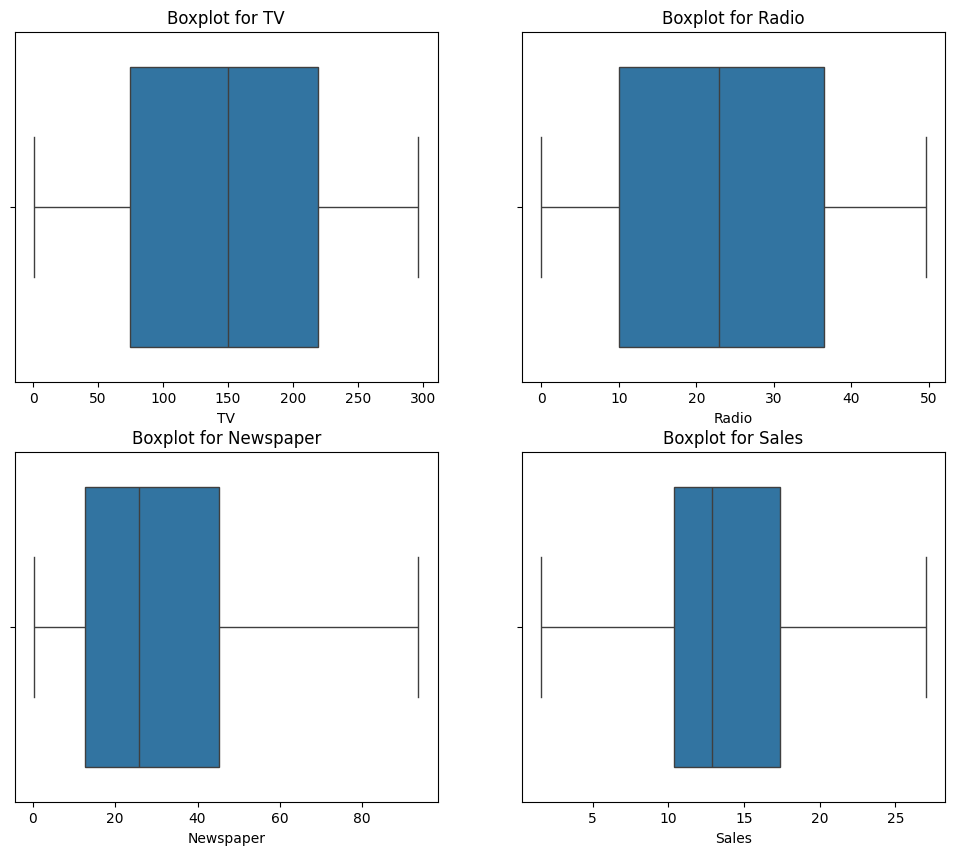

In [27]:
cols = df.columns
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

#### Select x and y

In [29]:
df.iloc[:,:-1]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [30]:
x = df.drop('Sales',axis=1)
y = df['Sales']
print(x.shape)
print(y.shape)

(200, 3)
(200,)


#### Split data into Train and Test

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)
#  (stratify = y ) - Preserve the percentage of target variable (y) is categorical and imbalanced samples for each class, used for better prediction 
# shuffle=True (default)

In [214]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import *

In [215]:
def eval_model(y_test,y_pred):
    mae =  mean_absolute_error(y_test,y_pred)
    mse =  mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 =   r2_score(y_test,y_pred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2)

#### 1) Linear Reg

In [216]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [217]:
ypred_lr1 = lr1.predict(x_test)
print(len(ypred_lr1))

50


In [218]:
ypred_lr1[:20]

array([12.6147397 , 12.88158303, 12.06724653, 16.83570477, 24.06186857,
       14.26374866, 20.43269886, 12.14270264, 10.07624962,  8.65658635,
       20.04030187, 19.3280917 , 12.10914707, 15.25183001, 17.24824177,
        9.75282234, 14.38112261, 16.51550036,  8.94346432, 16.0399232 ])

In [ ]:
eval_model(y_test,ypred_lr1) # interchange has no effect on result

In [220]:
print('Train_Score',lr1.score(x_train,y_train))  # Train R2_Score
print('Test_Score',lr1.score(x_test,y_test))     # Test R2_Score

Train_Score 0.9192498717954181
Test_Score 0.8180945316427762


#### Overfitting
1) when model has high train_score but compratively low test_Score.<br>
2) high variance and low bias.<br>

Train_R2_Score => 87       Test_R2_Score => 62 => highly overfit(non-tolerable)

Apply other models => Tune the models

Train_R2_Score => 87          Test_R2_Score => 84 =>(tolerable)

#### Underfitting
1)opp. of above

Bias: If high means the model is overly simplistic, may miss important and complex patterns

Variance: High means captures noise and sensitivity to fluctuations in the training data, poor generalization at new data.



#### Bias-Variance Tradeoff
1) Both inversely proportional so balance b/w them needed (sum of bias squared and variance.) <br>
2) Optmise to avoid overfitting and underfitting

#### Regularization
Treat overfitting in LR<br>

Cost Fn = MSE (minimzed iteratiely) match predictions with true y (diff b/w them)

Training Phase: model optimises its (weights and biases) iteratively to minimize it . Optimization algos such as gradient descent used.

Validation Phase: After training, the model's performance is evaluated using a separate validation dataset. The cost function is used to quantify how well the model generalizes to new data, helps in identifying overfitting/ underfitting

Hyperparameter Tuning: (e.g., learning rate, regularization strength) minimizes the cost function

Best Model Selection: cost fn serves key criterion

Early Stopping: In iterative training processes. Training is halted when the cost fn on the validation set stops decreasing or starts increasing

#### Types of Regularization
#### 1) Ridge Regression
a) adds a penalty to the cost Fn (MSE + alpha*(sum(m^2))) **********<br>

#### 2) Lasso Regression
a) adds a penalty to the cost Fn(MSE + alpha*(sum|m|))*********** <br>
c) Creates sparsity through the L1 penalty, which encourages the regression coeffs to be small, in many cases, exactly zero, prevent overfitting by excluding less relevant features(used for feature selection.)

#### Ridge Model

In [221]:
rid1 = Ridge(alpha = 2500)
rid1.fit(x_train,y_train)

Ridge(alpha=2500)

In [222]:
print('Train_Score',rid1.score(x_train,y_train))  # Train R2_Score
print('Test_Score',rid1.score(x_test,y_test))     # Test R2_Score

Train_Score 0.9175460967412103
Test_Score 0.8249615110614501


In [223]:
print('Train_Score',lr1.score(x_train,y_train))  # Train R2_Score
print('Test_Score',lr1.score(x_test,y_test))     # Test R2_Score

Train_Score 0.9192498717954181
Test_Score 0.8180945316427762


#### Lasso Regression

In [224]:
las1 = Lasso(alpha = 2.5)
las1.fit(x_train,y_train)

Lasso(alpha=2.5)

In [225]:
print('Train_Score',las1.score(x_train,y_train))  # Train R2_Score
print('Test_Score',las1.score(x_test,y_test))     # Test R2_Score

Train_Score 0.9179151062301485
Test_Score 0.8235725548499102


In [231]:
print(lr1.coef_)
print(rid1.coef_)
print(las1.coef_)

[ 0.04420282  0.19719138 -0.00485864]
[ 0.04431088  0.18172134 -0.00094722]
[ 0.04398463  0.18384825 -0.        ]


In [235]:
np.random.rand(100, 10)

array([[5.57146129e-01, 5.54390387e-01, 1.78024894e-02, 5.63613383e-01,
        3.95228591e-01, 8.43024525e-02, 2.90400257e-01, 9.21579454e-01,
        1.63607268e-01, 2.89767951e-01],
       [8.04787338e-01, 1.81799893e-01, 3.30369376e-01, 4.22534939e-01,
        9.25057218e-01, 8.45479757e-01, 2.75839384e-02, 5.59728531e-01,
        5.33622885e-01, 7.74550490e-01],
       [7.85969832e-01, 7.93196577e-01, 6.11316144e-01, 2.15865908e-01,
        2.65846386e-01, 9.83878361e-01, 7.11216802e-01, 9.36046474e-01,
        6.03434215e-01, 9.22698346e-01],
       [2.42324989e-01, 6.85531832e-01, 6.78233811e-01, 6.83722028e-01,
        9.80636350e-01, 7.83781258e-02, 1.41124104e-01, 2.16627266e-01,
        2.45187800e-01, 9.79792065e-01],
       [5.03255605e-01, 4.19391195e-01, 8.09827289e-01, 3.37824349e-01,
        3.78133480e-01, 4.70823449e-01, 3.46944097e-01, 5.20792359e-01,
        6.79264244e-01, 2.29272559e-01],
       [7.78859090e-01, 5.87894406e-01, 8.83947593e-01, 2.18661128e-01,
   

The Elastic Net regression equation combines both Lasso (L1) and Ridge (L2) regularization techniques to balance feature selection and coefficient shrinkage. 

L1 Norm: Encourages sparsity (some coefficients shrink to 0,feature selection).
L2 Norm: Encourages small, smooth coefficients to avoid overfitting.

In [240]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV

# Example data
X = np.random.rand(100, 10) # 100 random row with 10 col.
y = np.random.rand(100)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
elastic_net = ElasticNet()

# Defining the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Grid search to find the best parameters
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Predictions
y_pred = best_model.predict(X_test)

# Performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
Mean Squared Error: 0.061337923911280144


### grid search scoring options 
r2: R^2 (coefficient of determination) regression score.
neg_mean_absolute_error: Negative mean absolute error.
neg_mean_squared_error: Negative mean squared error.
neg_root_mean_squared_error: Negative root mean squared error.
neg_median_absolute_error: Negative median absolute error.

if lasso gives best r2 score on test data what will be next step then

In [239]:
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=best_alpha)  # use the best alpha from previous tuning
cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R² scores: {cv_scores}')
print(f'Mean Cross-Validation R²: {np.mean(cv_scores)}')


NameError: name 'best_alpha' is not defined

In [ ]:
param_grid = {'alpha': np.linspace(best_alpha * 0.1, best_alpha * 2, 100)}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']

In [ ]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)
print(f'Coefficients: {lasso.coef_}')

In [ ]:
# Residual Plots: Plot residuals to detect non-linearity, heteroscedasticity, or outliers.

import matplotlib.pyplot as plt
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
Model Comparison

In [ ]:
 Model Deployment

In [ ]:
import joblib
joblib.dump(lasso, 'lasso_model.pkl')

When to Use Cross-Validation and GridSearchCV
1. Complex Models with Many Hyperparameters:
such as Support Vector Machines, Random Forests, or Neural Networks

2. Small to Medium Datasets:

3. Model Comparison:

4. Avoiding Overfitting:
Cross-validation helps in checking if the model generalizes well to unseen data.

# for large data set
random_search = RandomizedSearchCV(Lasso(), param_distributions, n_iter=20, cv=3, scoring='r2', random_state=42)